In [21]:
from neuralop.models import TFNO
import os
import sys
sys.path.append(os.path.expanduser("~"))
from camel_dataloader import get_astro_data,get_astro_data_2D_from_3D
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator, FormatStrFormatter
import time
import torch

In [7]:
operator = TFNO(n_modes=(16, 16), hidden_channels=256,
                in_channels=1,
                out_channels=1,
                factorization='tucker',
                implementation='factorized',
                rank=0.05)

In [4]:
cropsize = 256
batch_size = 12
num_workers = 8
   
dataset = 'Astrid'
dm_25_thick = get_astro_data(
        dataset,
        num_workers=num_workers,
        # resize=cropsize,
        batch_size=batch_size,
    )

In [5]:
conditioning, params, target = next(iter(dm_25_thick.test_dataloader()))

In [14]:
start_time = time.time()
sample = operator(conditioning)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time for one batch 50 sims: {execution_time:.4f} seconds")

Execution time for one batch 50 sims: 13.8827 seconds


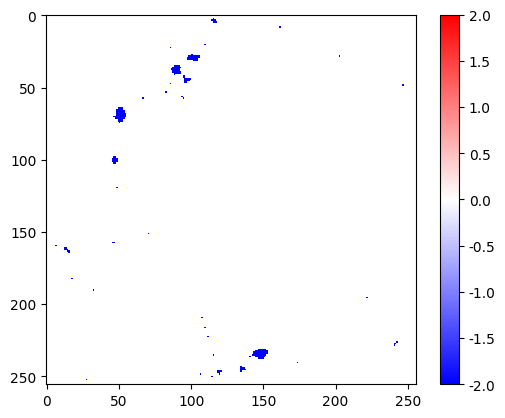

In [22]:
delta_log = torch.log(sample[0]) - torch.log(conditioning[0])

colors = [(0, 'blue'), (0.5, 'white'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('custom', colors)
vmin = -2.0
vmax = 2.0
im = plt.imshow(delta_log.detach().numpy().reshape([256,256]),  cmap=cmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, format=FormatStrFormatter('%.1f'))
plt.show()